In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Read images

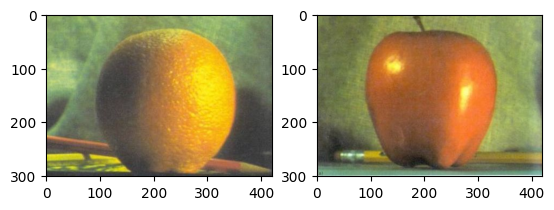

In [3]:
fig = plt.figure()

orange = cv2.imread("../../images/orange.jpg")
o = fig.add_subplot(2,2,1)
o.imshow(cv2.cvtColor(orange, cv2.COLOR_BGR2RGB))

apple = cv2.imread("../../images/apple.jpg")
a = fig.add_subplot(2,2,2)
a.imshow(cv2.cvtColor(apple, cv2.COLOR_BGR2RGB))

### Downsample // Upsample

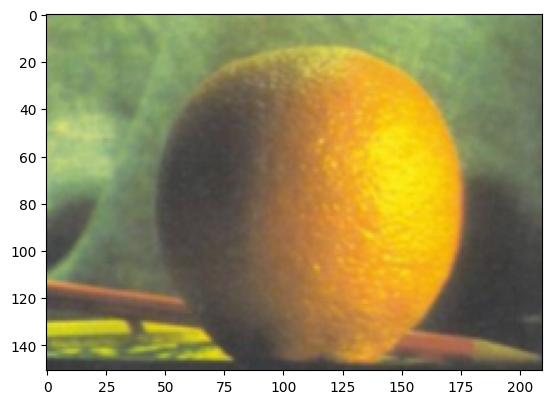

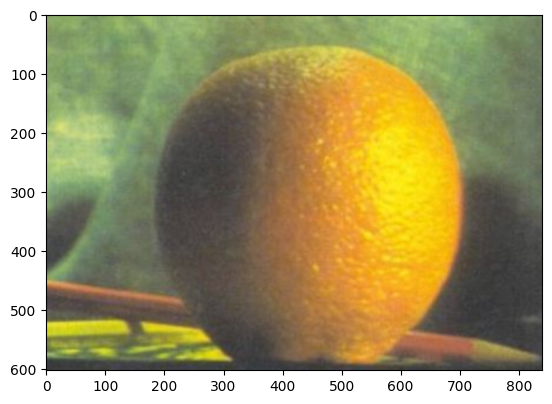

In [4]:
def downsample(img):
    return cv2.pyrDown(img)
def upsample(img):
    return cv2.pyrUp(img)

little = downsample(orange)
plt.imshow(cv2.cvtColor(little, cv2.COLOR_BGR2RGB))
plt.show()


big = upsample(orange)
plt.imshow(cv2.cvtColor(big, cv2.COLOR_BGR2RGB))
plt.show()

# Main Code

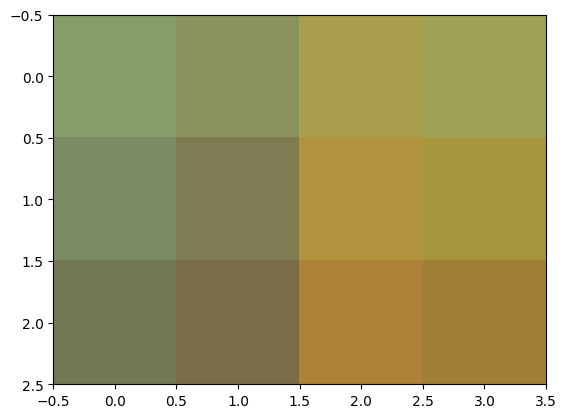

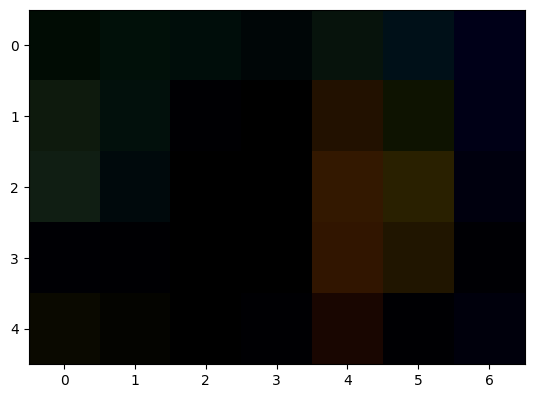

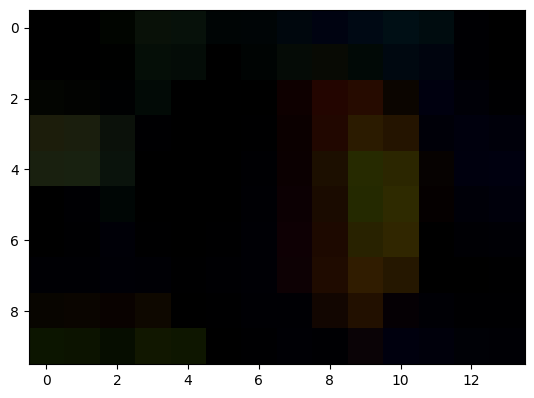

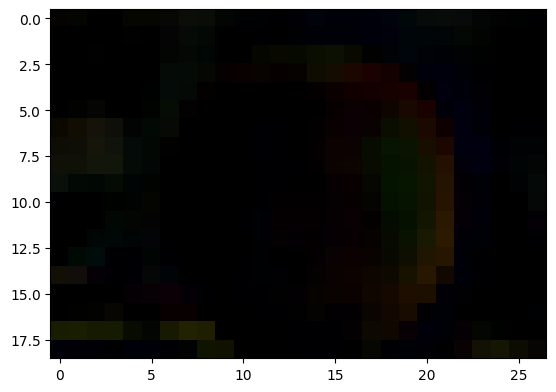

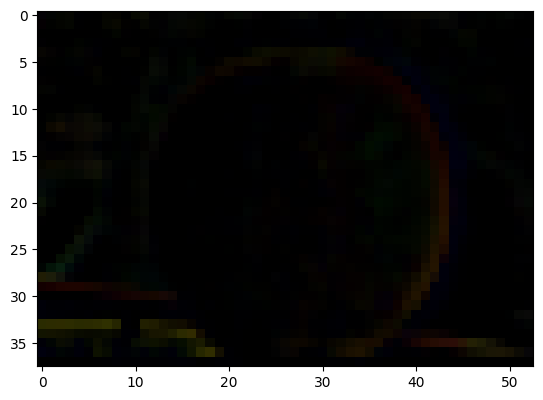

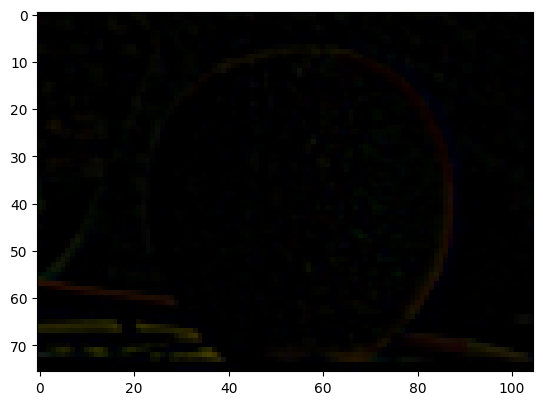

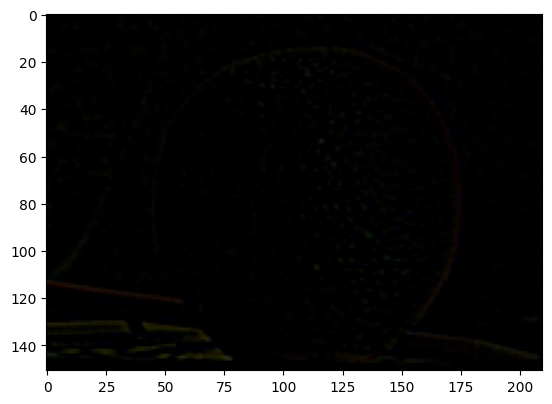

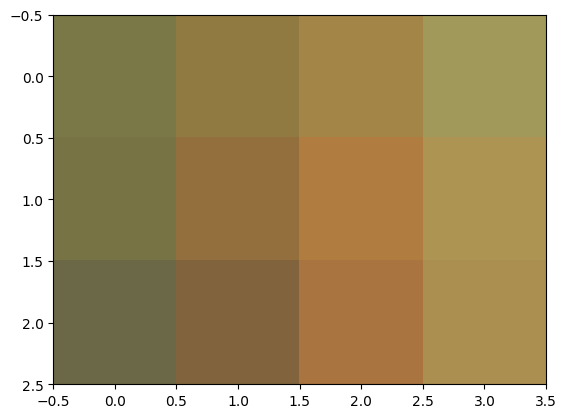

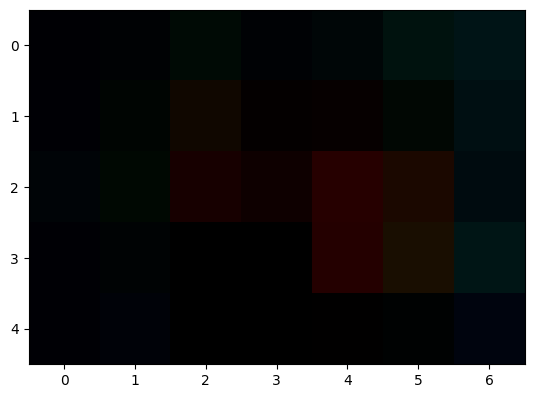

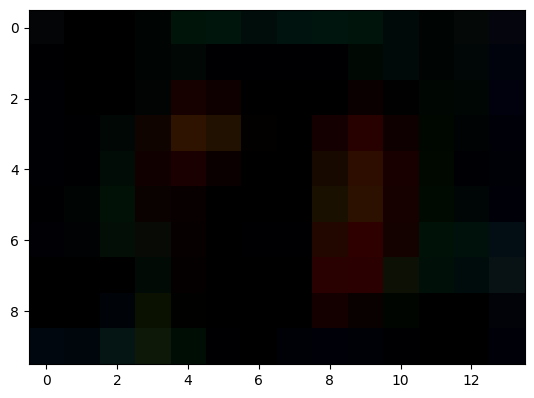

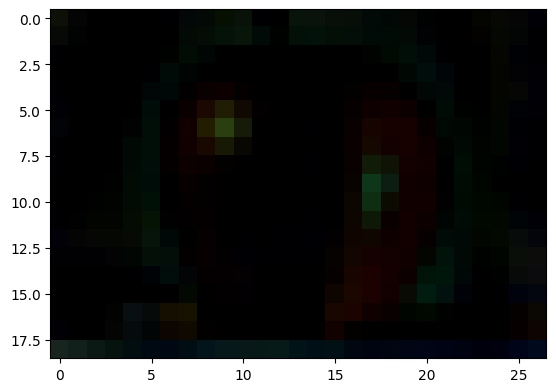

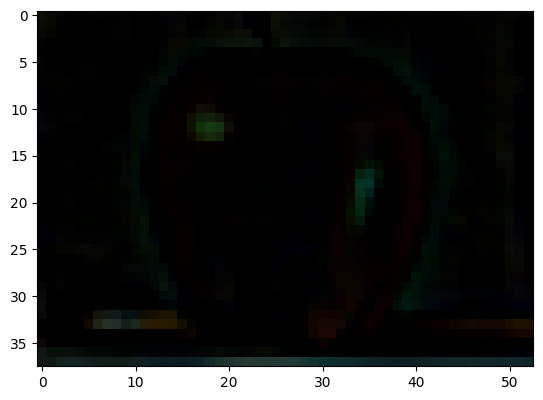

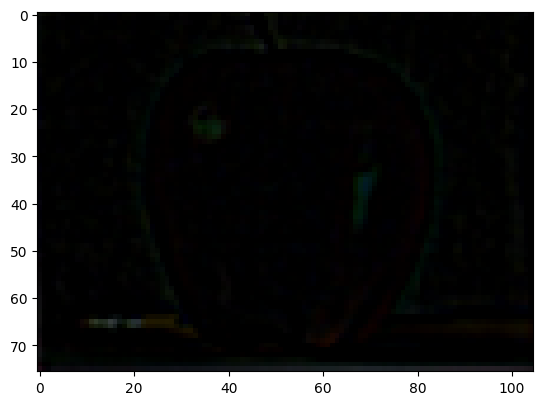

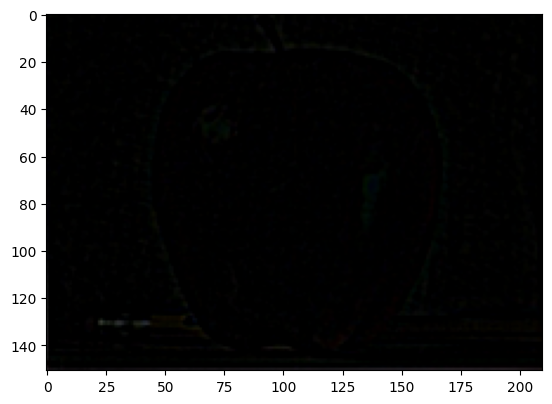

In [37]:
nPy = 7

orangeG = orange.copy()
oGauss = [orangeG]


''' Orange '''
# Orange Gaussian
for i in range(nPy):
    orangeG = cv2.pyrDown(orangeG)
    oGauss.append(orangeG)

# Laplace Pyramid
oLapl = [oGauss[-1]]
for i in range(nPy,0,-1):
    size = (oGauss[i - 1].shape[1], oGauss[i - 1].shape[0])
    orangeUP = cv2.pyrUp(oGauss[i], dstsize=size)
    laplacian = cv2.subtract(oGauss[i-1], orangeUP)
    oLapl.append(laplacian)

for i in range(nPy):
    plt.imshow(cv2.cvtColor(oLapl[i], cv2.COLOR_BGR2RGB))
    plt.show()


''' Apple '''
appleG = apple.copy()
aGauss = [appleG]
# Apple Gaussian
for i in range(nPy):
    appleG = cv2.pyrDown(appleG)
    aGauss.append(appleG)

# Laplace Pyramid
aLapl = [aGauss[-1]]
for i in range(nPy,0,-1):
    size = (aGauss[i - 1].shape[1], aGauss[i - 1].shape[0])
    appleUP = cv2.pyrUp(aGauss[i], dstsize=size)
    laplacian = cv2.subtract(aGauss[i-1], appleUP)
    aLapl.append(laplacian)

for i in range(nPy):
    plt.imshow(cv2.cvtColor(aLapl[i], cv2.COLOR_BGR2RGB))
    plt.show()



